<a href="https://colab.research.google.com/github/RicardColomOrero/easymoney/blob/main/Easymoney_grupo5_target_debit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENUNCIADO CAPSTONE


## 1.- PowerBI (Opcional)
Hemos decidido reorientar nuestra estrategia comercial hacia el
**aumento de la penetración de la cartera actual de productos en nuestro mercado**, con la idea de obtener una
mejor rentabilidad de nuestra base actual de clientes (lo del cuadrante barato de la matriz de Ansoff).

A cambio, reduciremos la actividad intensiva de captación que veníamos realizando desde que arrancamos. En este sentido, y para acabar de definir la estrategia, estaría genial poder tener algunos análisis que nos ayuden
a tomar decisiones. Como te decía, ahora tenemos un autoservicio, pero esta foto simple no nos ayuda demasiado.
Si ni siquiera sé cuantos productos hemos vendido este mes o si son los clientes nuevos quiénes contratan o los que ya teníamos!

Sería genial incluso que pudieses utilizar el reciente producto adquirido
PowerBI para **preparar unos KPI’s de lo que tenemos en la empresa**

## 2.- Propensión (modelo de propensión a compra)

Una vez que hayamos hecho el **análisis de nuestra BBDD nos gustaría poder vender más y mejor nuestros productos**, sé que los data scientist tienen una “bola de cristal” y saben qué clientes son más propensos a
comprar nuestros productos así que te pido por favor hagas un **modelo de propensión a compra**, se que tenemos muchos productos, así que te **,dejo a tu criterio científico qué productos elegir, o pueden ser varios,**, ya
me sorprenderás

## 3.- Segmentación

Una vez obtenido la propensión de los productos sería genial poder conocer mejor a nuestros clientes para orientar nuestra actividad comercial. Hace tiempo vengo teniendo la idea de que podríamos **segmentar la base
de clientes en 7 u 8 grupos de clientes similares**... sería genial** identificarlos, y poder saber cómo son los clientes
que pertenecen a estos grupos**... nos ayudaría muchísimo a la hora de definir todo nuestro plan de marketing de cara a futuro!

## 4.- Caso de uso

Perfecto! Tenemos las segmentaciones de clientes, tenemos las propensiones y ahora lo que nos falta es realizar
**un caso de uso que nos permita estimar en base a una campaña X cuánto dinero podemos ganar**,

¿A cuántos clientes tenemos que impactar?

¿Qué productos ofrecer?

¿Impactamos a todos lo segmentos indicados?

**Restricción de 10.000 clientes para la campaña.**

# Importación de librerías

In [298]:
import numpy as np # Arrays
import pandas as pd # Series and Dataframes

from google.colab import files

#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 200
plt.style.use('ggplot') # Beautify Plots

#Modelling
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



In [299]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print("***INFO***")
    print(df.info(verbose = verbose))

    print("***DESCRIPTIVOS CATEGORICAS***")
    try:
      print(df.describe(include = ['object']))
    except:
          print("Oops!  No hay variables categóricas")

    print("***DESCRIPTIVOS NUMÉRICAS***")
    try:
      print(df.describe(exclude = ['object']))
    except:
          print("Oops!  No hay variables categóricas")

    print("***NULOS***")
    total_nulos = df.isnull().sum().sum()
    print(df.isnull().sum())
    print(f"Tenemos un total de {total_nulos} nulos")

# Importación dataset

In [301]:
#file_dir = "/content/drive/MyDrive/NUCLIO/TFM  Data Science/datasets_TFM_y_diccionario/" #Ricard file_dir
# file_dir = "/content/drive/MyDrive/TFM  Data Science/datasets_TFM_y_diccionario/" #Eva file_dir
file_dir = "/content/drive/MyDrive/Master_DS/TFM_Data_Science/datasets_TFM_y_diccionario/" #Culebra file_dir

In [302]:
file_sales ="sales.csv"
file_product_description ="product_description.csv"
file_customer_sociodemographics ="customer_sociodemographics.csv"
file_customer_commercial_activity = "customer_commercial_activity.csv"
file_customer_products ="customer_products.csv"
file_provincias = "inform_adicional_por_provincias.csv"

In [ ]:
sales_raw = pd.read_csv(file_dir + file_sales)
product_description_raw = pd.read_csv(file_dir +file_product_description)
customer_sociodemographics_raw = pd.read_csv(file_dir + file_customer_sociodemographics)
customer_commercial_activity_raw = pd.read_csv(file_dir + file_customer_commercial_activity)
customer_products_raw = pd.read_csv(file_dir + file_customer_products)

In [ ]:
info_provincias_raw = pd.read_csv(file_dir + file_provincias)

In [ ]:
del file_sales
del file_product_description
del file_customer_sociodemographics
del file_customer_commercial_activity
del file_customer_products
del file_provincias

# 2.- DATA UNDERSTANDING

In [ ]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print("***INFO***")
    print(df.info(verbose = verbose))

    print("***DESCRIPTIVOS CATEGORICAS***")
    try:
      print(df.describe(include = ['object']))
    except:
          print("Oops!  No hay variables categóricas")

    print("***DESCRIPTIVOS NUMÉRICAS***")
    try:
      print(df.describe(exclude = ['object']))
    except:
          print("Oops!  No hay variables categóricas")

    print("***NULOS***")
    total_nulos = df.isnull().sum().sum()
    print(df.isnull().sum())
    print(f"Tenemos un total de {total_nulos} nulos")

### Sales

* pk_sale: Identificador de venta - (primary key)
* cid: Identificador de cliente - (foreing key)
* month_sale: Mes de venta. Mes en el que se contrata un producto.
* product_ID: Identificador de producto  - (foreing key)
* net_margin: Margen neto generado por la venta ($)

In [ ]:
# Análisis inicial de sales

report_df(sales_raw)

In [ ]:
# ACCIONES A LLEVAR A CABO

# Eliminar columna Unnamed
# Renombrar columnas para alinear el naming, por ejemplo variable cid como "client_ID", pk_sale como "sale_ID"
# Cambiar los identificadores (product_ID, customer_ID) a variable categórica
# Cambiar tipo de month_sale a fecha
# Disgregar la fecha en mes, año... (otros: trimestre, fin de semana, festivo...)


### Product Description

* pk_product_ID	= Identificador de producto - (primary key)
* product_desc	= Descripción del producto
* family_product	= Vertical del producto. Grupo al que pertenece.

In [ ]:
# Análisis inicial de product description

report_df(product_description_raw)

In [ ]:
# ACCIONES A LLEVAR A CABO

# Eliminar columna Unnamed

### Customer Sociodemographics

* pk_cid =	Identificador de cliente
* pk_partition =	Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
* deceased =	Indicador de fallecimiento
* gender =	Sexo del cliente
* region_code =	Provincia de residencia del cliente (para ES)
* salary =	Ingresos brutos de la unidad familiar
* country_id =	País de residencia del cliente
* age =	Edad del cliente

In [ ]:
report_df(customer_sociodemographics_raw)

In [ ]:
customer_sociodemographics_raw["country_id"].value_counts(normalize = True).head()

In [ ]:
customer_sociodemographics_raw["region_code"].value_counts()

In [ ]:
# ACCIONES CUSTOMER SOCIODEMOGRAPHICS

# Gestionar nulos: (Culebra: tenemos modelo de clasificación así que lo que haremos será ponerles valores extremos)
#     region_code
#     gender
#     salary
# gender > Transformar a 1 y 0
# deceased > Transformar a 1 y 0
# country_id > Agrupar ES, OTHERS



### Customer Commercial Activity

* pk_cid = Identificador de cliente
* pk_partition =	Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
* entry_channel =	Canal de captación del cliente
* entry_date =	Fecha en la que realizó la primera contratación a través de easyMoney
* segment =	Segmento comercial del cliente
* active_customer =	Indicador de actividad del cliente en la app EasyMoney

In [ ]:
report_df(customer_commercial_activity_raw)

In [ ]:
customer_commercial_activity_raw["segment"].value_counts()

In [ ]:
customer_commercial_activity_raw["entry_channel"].value_counts(normalize = True).head(10)

In [ ]:
# ACCIONES CUSTOMER COMMERCIAL ACTIVITY**


# Eliminar columna Unnamed
# Cambiar los identificadores (pk_cid) a variable categórica
# Cambiar tipo de active_customer a boolean
# Establecer primary key como index?
# Gestionar nulos:
#     entry_channel
#     segment
# Cambiar tipo de entry_date a fecha
# Disgregar entry_date en mes, año, día, día de la semana (otros: trimestre, fin de semana, festivo...)
# entry_channel > OneHotEncoding o FrecuencyEncoding ( agrupar 11-12 etiquetas + OTHERS)
# segment > OneHotEncoding

### Customer Products

- pk_cid =	Identificador de cliente
- pk_partition =	Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
- credit_card =	Tenencia de tarjetas de crédito
- debit_card =	Tenencia de tarjetas de débito
- em_account_p =	Tenencia de Cuenta easyMoney+
- em_account_pp =	Tenencia de Cuenta easyMoney++
- em_acount =	Tenencia de Cuenta easyMoney
- emc_account =	Tenencia de Cuenta easyMoney Crypto
- funds =	Tenencia de Fondos de inversión
- loans =	Tenencia de Préstamos
- long_term_deposit =	Tenencia de Depósitos a largo plazo
- mortgage =	Tenencia de Mortgage
- payroll =	Tenencia de Domiciliaciones
- payroll_account =	Tenencia de Cuenta bonificada por domiciliaciones
- pension_plan =	Tenencia de Plan de pensiones
- securities =	Tenencia de Valores
- short_term_deposit =	Tenencia de Short-term deposits

In [ ]:
report_df(customer_products_raw)

In [ ]:
# ACCIONES CUSTOMER PRODUCTS

# Eliminar columna Unnamed
# Cambiar los identificadores (pk_cid) a variable categórica
# Cambiar tipo de columnas booleanas a boolean?
# Establecer primary key como index?
# Gestionar nulos:
#     payroll
#     pension_plan
# Eliminar em_account_pp, no hay datos

# Cambiar tipo de payroll y pension_plan a int

### Análisis del target

In [ ]:
# Para el modelo de propensión a compra (supervisado > clasificación) trataremos de averiguar la propensión a compra de ciertos productos de cada cliente
# El target puede ser:
#  - em_acount = 4.381.602  (73,48%)
#  - debit_card = 562.968 (9,44%)
#  - payroll_account = 329.420 (5,52%)
#  - pension_plan = 2.178.020 (3,65%) ** Target interesante por negocio



# Analizando el revenue de cada producto:
#  - pension_plan = media >5200€ ** Target interesante por revenue
#  - loans = media > 2000€
#  - mortgage = media > 2000€
#
#
# El producto "pension_plan" resulta interesante a nivel net margin, pues es el que más beneficios genera a la compañía

# Hecho el primero modelo para "pension plan", más tarde se puede volver a lanzar con otros target de interés, por ejemplo "debit_card"o "emc_account "


#TARGET = "debit_card"
#TARGET2 = 'debit_card'
#TARGET3 = 'emc_account'

In [ ]:
for i in ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities','long_term_deposit', 'em_account_pp','credit_card', 'payroll', 'pension_plan', 'payroll_account','emc_account', 'debit_card', 'em_account_p', 'em_acount']:
    suma_productos = customer_products_raw[i].sum()
    print (f"Suma de {i} = {suma_productos} . La media es de {round((suma_productos/customer_products_raw.shape[0])*100,2)}%")


### Distribución de las variables

#### Variables numéricas

In [ ]:
for i in sales_raw.select_dtypes(include= ["number"]).columns:
     print(i, sales_raw[i].value_counts())

In [ ]:
for i in customer_products_raw.select_dtypes(include= ["number"]).columns:
  print(i, customer_products_raw[i].value_counts())

In [ ]:
for i in customer_sociodemographics_raw.select_dtypes(include= ["number"]).columns:
     print(i, customer_sociodemographics_raw[i].value_counts())

#### Variables categóricas

In [ ]:
for i in sales_raw.select_dtypes(exclude= ["number"]).columns:
     print(i, sales_raw[i].value_counts())

In [ ]:
for i in customer_commercial_activity_raw.select_dtypes(exclude= ["number"]).columns:
  print(i, customer_commercial_activity_raw[i].value_counts())

In [ ]:
for i in customer_sociodemographics_raw.select_dtypes(exclude= ["number"]).columns:
  print(i, customer_sociodemographics_raw[i].value_counts())

# 3.- PRE PROCESSING

In [ ]:
def preprocesado_basico(df, cid="pk_cid"):
  # Eliminar columna Unnamed
  df.drop("Unnamed: 0", axis = 1, inplace = True)

  # Renombrar columnas para alinear el naming
  df.rename({cid: "customer_ID",'pk_partition':'partition_ID' },axis='columns',inplace = True)

  # Cambiar a fecha la partition ID
  df['partition_ID'] = pd.to_datetime(df['partition_ID'])

In [ ]:
def setOthers(dataframe, column, num_values=5):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('OTHERS')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('OTHERS')

In [ ]:
def comprobar_shapes(df1,df2,df_final):
  print("DF1 = " + str(df1.shape))
  print("DF2 = " + str(df2.shape))
  print("DF_final = " + str(df_final.shape))

## Sales

In [ ]:
df_sales1 = sales_raw.copy()

In [ ]:
df_sales1.head()

In [ ]:
# Eliminar columna Unnamed
df_sales1.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
# Renombrar columnas para alinear el naming
df_sales1.rename({"cid": "customer_ID",'pk_partition':'partition_ID' },axis='columns',inplace = True)

In [ ]:
#elimnar todas excepto,  month_sale, customer_id, y product_ID
df_sales1.drop("pk_sale", axis = 1, inplace = True) # Se elimina por no aportar nada, es un ID único y el que usaremos será el customer_id
df_sales1.drop("net_margin", axis = 1, inplace = True) # Se elimina por ser autoexplicativa y provocar data leakage

In [ ]:
# Cambiar los identificadores (product_ID, customer_ID) a variable categórica
df_sales1["product_ID"] = df_sales1["product_ID"].astype("object")
df_sales1["customer_ID"] = df_sales1["customer_ID"].astype("object")

In [ ]:
# Cambiar tipo de month_sale a fecha

df_sales1["month_sale"] = pd.to_datetime(df_sales1["month_sale"], format = "%Y/%m/%d")

# Cambiar tipo de customer_ID a número

df_sales1['customer_ID']=df_sales1['customer_ID'].astype('int')

In [ ]:
df_sales1['merge_date']=df_sales1['month_sale']-pd.DateOffset(months=1)

In [ ]:
# Disgregar la fecha en mes, año, día, día de la semana (otros: trimestre, fin de semana, festivo...)

#df_sales1["month_sales"] = df_sales1["month_sale"].dt.month
#df_sales1["year_sales"] = df_sales1["month_sale"].dt.year

In [ ]:
df_sales1.head()

In [ ]:
report_df(df_sales1)

## Product Description

In [ ]:
product_description_1 = product_description_raw.copy()

In [ ]:
product_description_1

In [ ]:
# Eliminar columna Unnamed
product_description_1.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
report_df(product_description_1)

## Customer Sociodemographics

In [ ]:
#hacemos una copia del dataset par eliminar los deceased yes
df_customer_soc1 = customer_sociodemographics_raw[customer_sociodemographics_raw['deceased']=='N'].copy()

In [ ]:
preprocesado_basico(df_customer_soc1)

In [ ]:
df_customer_soc1.drop("deceased", axis = 1, inplace = True)

In [ ]:
df_customer_soc1.head()

In [ ]:
report_df(df_customer_soc1)

Gestión de nulos

In [ ]:
# Asignamos valor extremos a "salary", "gender", "region_code" ya que vamos a hacer un DecisionTree

print(df_customer_soc1["salary"].describe())
df_customer_soc1["salary"].fillna(value = 0, inplace = True)

print(df_customer_soc1["gender"].value_counts(normalize = True))
df_customer_soc1["gender"].fillna(value = 2, inplace = True)

print(df_customer_soc1["region_code"].describe())
df_customer_soc1["region_code"].fillna(value = 1000, inplace = True)

Agrupación

In [ ]:
#agrupamos country_id en ES y OTHERS
print((df_customer_soc1["country_id"].value_counts(normalize=True)*100).head())

df_customer_soc1['country_id'] = setOthers(df_customer_soc1,'country_id',num_values=1)

print()
print((df_customer_soc1["country_id"].value_counts(normalize=True)*100).head())

#df1.drop("country_id", axis = 1, inplace = True)

In [ ]:
df_customer_soc1.head()

In [ ]:
report_df(df_customer_soc1)

In [ ]:
# Añadimos información de las provincias
df_customer_soc1 = df_customer_soc1.merge(info_provincias_raw, how = "left", left_on = "region_code", right_on = "codigo")

In [ ]:
df_customer_soc1.isnull().sum()

In [ ]:
del df_customer_soc1["region_code"]
del df_customer_soc1["codigo"]

In [ ]:
df_customer_soc1.head()

In [ ]:
df_customer_soc1["provincia"].fillna(value = "No definido", inplace = True)
df_customer_soc1["renta_neta_media"].fillna(np.mean(df_customer_soc1["renta_neta_media"]), inplace = True)
df_customer_soc1["renta_bruta_media"].fillna(np.mean(df_customer_soc1["renta_bruta_media"]), inplace = True)
df_customer_soc1["tasa_de_paro"].fillna(np.mean(df_customer_soc1["tasa_de_paro"]), inplace = True)
df_customer_soc1["tasa_de_empleo"].fillna(np.mean(df_customer_soc1["tasa_de_empleo"]), inplace = True)

## Customer commercial activity

In [ ]:
# La cantidad de clientes inactivos son 317.179
customer_commercial_activity_raw[customer_commercial_activity_raw["active_customer"] == 0]["pk_cid"].nunique()

In [ ]:
# Eliminamos los clientes inactivos del dataset al no ser target
df_cust_com_act1 = customer_commercial_activity_raw[customer_commercial_activity_raw['active_customer']==1].copy()

In [ ]:
preprocesado_basico(df_cust_com_act1)

In [ ]:
# Creamos la variable "Antiguedad" restando la última fecha de partition por el entry_date
df_cust_com_act1['antiguedad']=pd.to_datetime(df_cust_com_act1['partition_ID'].max())-pd.to_datetime(df_cust_com_act1['entry_date'])

In [ ]:
df_cust_com_act1['antiguedad']= round(df_cust_com_act1['antiguedad'].astype(int)/86400000000000/30) # En meses

In [ ]:
df_cust_com_act1.head()

In [ ]:
df_cust_com_act1['antiguedad'].unique()

In [ ]:
df_cust_com_act1.drop("active_customer", axis = 1, inplace = True)
df_cust_com_act1.drop("entry_date", axis = 1, inplace = True)

Gestión de nulos

In [ ]:
# Función para imputar nulos de Segment y Entry Channel

def imputacion_nulos(df,col):
  # Array con los ids que tienen nulos
  ids_null_unique = df[(df[col].isnull()==True)]['customer_ID'].unique()
  # Dataframe donde revisamos si en la última carga de datos hay un valor para los ids que tienen "entry_channel" nulo.
  valores_nulos = df[(df.customer_ID.isin(ids_null_unique))&(df[col].notnull())&(df['partition_ID']== "2019-05")][['customer_ID',col]]
  # Si el id con "entry_channel" nulo tenía un valor correcto en la última partition, se lo asignaremos a los valores nulos.
  dict_nulos = dict(zip(valores_nulos['customer_ID'],valores_nulos[col]))
  df.set_index('customer_ID',inplace = True)
  # Imputamos los últimos valores registrados correctamente en "segment" y "entry_channel"
  df[col].fillna(dict_nulos,inplace=True)
  df.reset_index(inplace = True)

In [ ]:
imputacion_nulos(df_cust_com_act1,col = 'segment')

In [ ]:
imputacion_nulos(df_cust_com_act1,col = 'entry_channel')

In [ ]:
# Imputación de valores extremos a los nulos que no se han podido deducir por el histórico
df_cust_com_act1['segment'].fillna(value='04 - NO SEGMENT',inplace=True)
df_cust_com_act1['entry_channel'].fillna(value='ZZZ',inplace=True)

Agrupación

In [ ]:
df_cust_com_act1['entry_channel']=setOthers(df_cust_com_act1,'entry_channel',num_values=13)

In [ ]:
df_cust_com_act1.head()

In [ ]:
report_df(df_cust_com_act1)

## Customer products

In [ ]:
df_cust_prod1 = customer_products_raw.copy()

In [ ]:
preprocesado_basico(df_cust_prod1)

In [ ]:
df_cust_prod1.head()

In [ ]:
# Eliminamos el Target de la tabla, lo crearemos a posteriori

df_cust_prod1.drop("debit_card", axis = 1, inplace = True)

In [ ]:
# Eliminamos variables de baja varianza

print(df_cust_prod1["em_account_p"].value_counts(normalize = True)*100)
print(df_cust_prod1["em_account_pp"].value_counts(normalize = True)*100)

del df_cust_prod1['em_account_pp']
del df_cust_prod1['em_account_p']

In [ ]:
# Eliminamos valores nulos de "payroll"

df_cust_prod1.dropna(subset = ['payroll'], inplace = True)

In [ ]:
# Cambiamos el type de las variables con float a int

df_cust_prod1['payroll'] = df_cust_prod1[['payroll']].applymap(int)
df_cust_prod1['pension_plan'] = df_cust_prod1[['pension_plan']].applymap(int)

In [ ]:
df_cust_prod1.head()

In [ ]:
report_df(df_cust_prod1)

## Merge de tablas

###customer commercial activity & cust_sociodemographics

In [ ]:
df_customer_soc1.shape

In [ ]:
df_customer_soc1[df_customer_soc1['customer_ID']==1128010]

In [ ]:
customer_sociodemographics_raw[customer_sociodemographics_raw['pk_cid']==1128010]
#cheqeuo un cliente que tiene nulos al mergear, es un cliente que fallece en enero del 2019, por eso no tiene datos a partir de esa fecha porque hemos eliminado los clientes a partir de su fallecimiento.

In [ ]:
df_customer_soc1.head()

In [ ]:
df_cust_com_act1.shape

In [ ]:
df_cust_com_act1.head()

In [ ]:
#customer commercial activity tiene menos filas porque hemos eliminado los clientes inactivos

In [ ]:
df_merge1=df_cust_com_act1.merge(df_customer_soc1,how="left", on=["customer_ID","partition_ID"])

In [ ]:
df_merge1.shape

In [ ]:
df_merge1.head()

In [ ]:
df_merge1.isnull().sum()

In [ ]:
#718 nulos de la tabla de sociodemographics, son clientes que no existen en la tabla de socidemographics, son las filas de las particiones donde los clientes están fallecidos, los eliminamos

In [ ]:
df_merge1[df_merge1['country_id'].isnull()]

In [ ]:
df_merge1[df_merge1['customer_ID']==1128010]

In [ ]:
df_merge1.dropna( inplace = True)

In [ ]:
df_merge1.isnull().sum()

### '+ customer products

In [ ]:
df_merge1.shape


In [ ]:
df_cust_prod1.shape

In [ ]:
df_merge1.head()

In [ ]:
df_cust_prod1.head()

In [ ]:
df_merge2=df_merge1.merge(df_cust_prod1,how="left", on=["customer_ID","partition_ID"])


In [ ]:
df_merge2.head()

In [ ]:
df_merge2.isnull().sum()

In [ ]:
#hemos añadido 37 nulos con este merge

In [ ]:
df_merge2[df_merge2['loans'].isnull()]

In [ ]:
df_merge2[df_merge2['customer_ID']==1237715]

In [ ]:
df_cust_prod1[df_cust_prod1['customer_ID']==1237715]

In [ ]:
df_merge2[df_merge2['customer_ID']==1387288]

In [ ]:
df_cust_prod1[df_cust_prod1['customer_ID']==1387288]

In [ ]:
#son clientes que en esa partición no tienen datos en la tabla original, elimnamos los nulos

In [ ]:
df_merge2.dropna( inplace = True)

In [ ]:
df_merge2.isnull().sum()

### '+ sales

In [ ]:
df_merge2.shape

In [ ]:
df_sales1.shape

In [ ]:
df_merge2.head()

In [ ]:
df_sales1.rename({'merge_date':'partition_ID' },axis='columns',inplace = True)

In [ ]:
df_sales1.head()

In [ ]:
df_total4=df_merge2.merge(df_sales1,how="left", on=["customer_ID","partition_ID"])

In [ ]:
df_total4.shape

In [ ]:
df_total4.head()



In [ ]:
df_total4.isnull().sum(

)

In [ ]:
df_total4[df_total4['month_sale'].isnull()]

In [ ]:
df_total4[df_total4['customer_ID']==1375586]

In [ ]:
df_total4[df_total4['partition_ID']=='2019-05-01']

In [ ]:
df_total4[df_total4['partition_ID']=='2019-05-01']['product_ID'].isnull().sum()

In [ ]:
#la ultima partición mayo de 2019 no tiene datos en ventas porque no han sucedido, hay que separar esta parte del dataset.
# el

In [ ]:
df_total5=df_total4[df_total4['partition_ID']!='2019-05-01']

In [ ]:
df_total_pred=df_total4[df_total4['partition_ID']=='2019-05-01']

In [ ]:
df_total_pred.shape

In [ ]:
df_total5

In [ ]:
df_total5.isnull().sum()

In [ ]:
df_total5[df_total5['month_sale'].isnull()]

In [ ]:
df_total5[df_total5['customer_ID']==1375586]

In [ ]:
#ahora podemos elimnar los nulos de las columnas de month sale y product_Id porque son ventas que no se han producido
#los valores no-nulos de month_sale y product_id nos indican CUÁNDO se ha producido la adquisición de ese producto,
#si el cliente no ha comprado productos durante el resto de los meses, esos valores son los NULOS

In [ ]:
df_total5.isnull().sum()

In [ ]:
df_total6=df_total5.copy()

In [ ]:
#df_total5.dropna( inplace = True)

In [ ]:
df_total6.dropna( inplace = True)

In [ ]:
df_total6.isnull().sum()

In [ ]:
df_total6.shape

In [ ]:
# Eliminamos las variables que hemos utilizado para el merge y ya no necesitamos
df_total6.drop("partition_ID", axis = 1, inplace = True)


In [ ]:
df_total6.head().T

## Procesamiento de variables del df mergeado

In [ ]:
# Reordenación del dataset
df_total6 = df_total6.reindex(columns=[
              'month_sale',
              'product_ID',
              'customer_ID',
              'antiguedad',
              'entry_channel',
              'segment',
              'country_id',
              'gender',
              'age',
              'salary',
              'provincia',
              'renta_neta_media',
              'renta_bruta_media',
              'tasa_de_paro',
              'tasa_de_empleo',
              'short_term_deposit',
              'loans',
              'mortgage',
              'funds',
              'securities',
              'long_term_deposit',
              'credit_card',
              'payroll',
              'payroll_account',
              'emc_account',
              'pension_plan',
              'em_acount',
              ])

In [ ]:
df_pre = df_total6.copy()

In [ ]:
# Disgregamos la variable de "month_sale" y eliminamos la variable de fecha
df_pre['sale_month'] = df_pre['month_sale'].dt.month
df_pre['sale_year'] = df_pre['month_sale'].dt.year
#df_pre['sale_wday'] = df_pre['month_sale'].dt.weekday
#df_pre['sale_day'] = df_pre['month_sale'].dt.day

del df_pre['month_sale']

In [ ]:
df_pre.head().T

In [ ]:
df_pre.info()

### Transformación de categóricas

In [ ]:
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [ ]:
# OHE "product_ID"

df_pre = OHE(df_pre, "product_ID")

In [ ]:
# OHE "entry_channel"

df_pre = OHE(df_pre, "entry_channel")

In [ ]:
# OHE segment

df_pre = OHE(df_pre, "segment")

In [ ]:
# OHE country_id
df_pre = OHE(df_pre, "country_id")

In [ ]:
# OHE provincia
df_pre = OHE(df_pre, "provincia")

In [ ]:
# gender --> 1 = Hembras, 0 = Varones, 2 = Nulos

df_pre["gender"] = df_pre["gender"].replace("H", 1) # H es de Hembras
df_pre["gender"] = df_pre["gender"].replace("V", 0) # V es de Varones

In [ ]:
df_pre.info(verbose=True)

In [ ]:
#df_final=df_pre.to_pickle('/content/drive/MyDrive/TFM  Data Science/df_preprocesado') # Eva
#df_final=df_pre.to_pickle('/content/drive/MyDrive/NUCLIO/TFM  Data Science/df_preprocesado') # Ricard
df_final=df_pre.to_pickle('/content/drive/MyDrive/Master_DS/TFM_Data_Science/df_preprocesado') # Culebra

In [ ]:
#df_final=pd.read_pickle('/content/drive/MyDrive/TFM  Data Science/df_preprocesado')# Eva
#df_final=pd.read_pickle('/content/drive/MyDrive/NUCLIO/TFM  Data Science/df_preprocesado') # Ricard
df_final=pd.read_pickle('/content/drive/MyDrive/Master_DS/TFM_Data_Science/df_preprocesado') # Culebra

#### Correlación variables

In [ ]:
corr=df_final.corr()

In [ ]:
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [ ]:
corr2.stack().sort_values()

In [ ]:
corr3=corr2.unstack().dropna()

In [ ]:
corr4 = corr3.sort_values()

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
corr4

In [ ]:
#Eliminar pension_plan, segment_04 - NO SEGMENT, provincia_No definido y country_id_OTHERS

## Ajustamos el data set para el TARGET "debit card"

In [ ]:
del df_final['pension_plan']
del df_final['segment_04 - NO SEGMENT']
del df_final['provincia_No definido']
del df_final['country_id_OTHERS']

In [ ]:
for i in ["product_ID_1119","product_ID_1364","product_ID_2234","product_ID_2235","product_ID_2312","product_ID_2335",
          "product_ID_2336","product_ID_2673","product_ID_4033","product_ID_4657",
          "product_ID_8871","product_ID_9001"]:
          del df_final[i]

In [ ]:
TARGET = 'product_ID_3819'

In [ ]:
df_final['product_ID_3819'].value_counts(normalize = True)

In [ ]:
df_final=df_final.set_index("customer_ID")

In [ ]:
df_final.head()

In [ ]:
# Un 30% de las ventas realizadas corresponden a debit card

## Partición train/test/validation

In [ ]:
df_final.columns

In [ ]:
COLUMNS_TO_DROP = ['renta_neta_media',
                   'tasa_de_paro'
                   ]

In [ ]:
df_final.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [ ]:
# La partición de validación tiene que ser lo más parecida a la realidad posible, un % del dataset siempre mayor de 2000 filas. tenemos 111186  en total
# Tomaremos para validación el último mes registrado con datos de ventas, mayo de 2019, y el resto de datos para train/test.

In [297]:
# Partición de validación y develop
val_df = df_final[(df_final['sale_year']==2019) & (df_final['sale_month']==5)]
#dev_df = df_final[~((df_final['sale_year'] == 2019) & (df_final['sale_month'] ==5))]
dev_df = df_final[~((df_final['sale_year']!=2019) & ((df_final['sale_month']== 2) | (df_final['sale_month']== 3) | (df_final['sale_month']== 4)| (df_final['sale_month']== 5)| (df_final['sale_month']== 6)| (df_final['sale_month']== 7)) | (df_final['sale_year'] == 2019) & (df_final['sale_month'] == 5))]


In [174]:
val_df.shape # 6000 regstros para validar

(6509, 90)

In [175]:
dev_df.shape # 105k registros para train y test

(80987, 90)

In [176]:
val_df_y = val_df[[TARGET]]

val_df_X = val_df.drop(TARGET,axis=1)

# Rebalanceo del dataset

In [177]:
dev_df_zero = dev_df[dev_df[TARGET] == 0]

In [178]:
dev_df_nonzero = dev_df[dev_df[TARGET] > 0]

In [179]:
dev_df_zero.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56153 entries, 548825 to 1052194
Columns: 90 entries, antiguedad to provincia_Ávila
dtypes: float64(16), int64(3), uint8(71)
memory usage: 12.4 MB


In [180]:
dev_df_nonzero.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24834 entries, 624513 to 1052154
Columns: 90 entries, antiguedad to provincia_Ávila
dtypes: float64(16), int64(3), uint8(71)
memory usage: 5.5 MB


In [181]:
len(dev_df_nonzero)*1

24834

In [182]:
n_sample = len(dev_df_nonzero)*1 #equivale a una proporción de 50% - 50% : 24834

In [183]:
dev_df_zero_sample = dev_df_zero.sample(n = n_sample, random_state = 42)

In [184]:
dev_df_zero_sample.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24834 entries, 1133931 to 1299669
Columns: 90 entries, antiguedad to provincia_Ávila
dtypes: float64(16), int64(3), uint8(71)
memory usage: 5.5 MB


In [185]:
df_dev_sample = pd.concat([dev_df_nonzero,dev_df_zero_sample])

In [186]:
df_dev_sample.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49668 entries, 624513 to 1299669
Columns: 90 entries, antiguedad to provincia_Ávila
dtypes: float64(16), int64(3), uint8(71)
memory usage: 10.9 MB


In [187]:
df_dev_sample[TARGET].value_counts(normalize = True)

1    0.5
0    0.5
Name: product_ID_3819, dtype: float64

### Train y Test 2

In [188]:
dev_df_y = df_dev_sample[[TARGET]]

dev_df_x = df_dev_sample.drop(TARGET,axis=1)

In [ ]:
#20% del dataset de development para test

In [228]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_x, dev_df_y, test_size=0.15, random_state=42)

In [ ]:
#Comprobar que la distribución de ambas particiones es parecida (media, percentiles y distrribución std). Si no lo es, cambiamos el random state o utilizamos k.fold

In [229]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
antiguedad,42217.0,19.973020,13.366806,2.0,9.0,16.0,30.00,53.00
gender,42217.0,0.448113,0.497306,0.0,0.0,0.0,1.00,1.00
age,42217.0,36.183054,12.657714,2.0,27.0,34.0,43.00,101.00
salary,42217.0,79688.855224,194472.037323,0.0,0.0,63887.4,110254.35,28894395.51
renta_bruta_media,42217.0,14659.891953,1528.553938,11354.0,14028.0,15183.0,15226.00,19689.00


In [230]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
antiguedad,7451.0,19.703127,13.140824,2.0,9.0,16.00,29.000,53.00
gender,7451.0,0.452288,0.498021,0.0,0.0,0.00,1.000,2.00
age,7451.0,36.317407,12.654852,10.0,27.0,34.00,43.000,99.00
salary,7451.0,81401.056226,200282.072731,0.0,0.0,62112.96,108932.055,9833872.77
renta_bruta_media,7451.0,14664.420842,1526.311996,11354.0,14028.0,15183.00,15226.000,19689.00


In [192]:
val_df_X.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
antiguedad,6509.0,13.363497,13.838885,1.0,3.0,7.0,20.00,53.00
gender,6509.0,0.447841,0.497310,0.0,0.0,0.0,1.00,1.00
age,6509.0,37.620372,13.049189,4.0,28.0,35.0,44.00,102.00
salary,6509.0,44365.363703,78782.924826,0.0,0.0,0.0,73236.15,1128612.96
renta_bruta_media,6509.0,14686.211826,1518.647151,11354.0,14028.0,15183.0,15226.00,19689.00


# 4.- Modelling 2

## DECISSION TREE

In [250]:
#Instanciamos el modelo
dt = DecisionTreeClassifier(max_depth=9,random_state=42, min_samples_split=500)

In [251]:
#lo entrenamos con el dataset de train
dt.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=500, random_state=42)

In [233]:
#lo pintamos
tree_data=export_graphviz(
    decision_tree=dt,
    out_file=None,
    max_depth=None,
    feature_names=X_test.columns,
    class_names=['no_debit_card','debit_card'],
    label="all",
    filled=True,
    leaves_parallel=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate=True,
    rounded=True,
    special_characters=False,
    precision=3,
    fontname="helvetica",
)

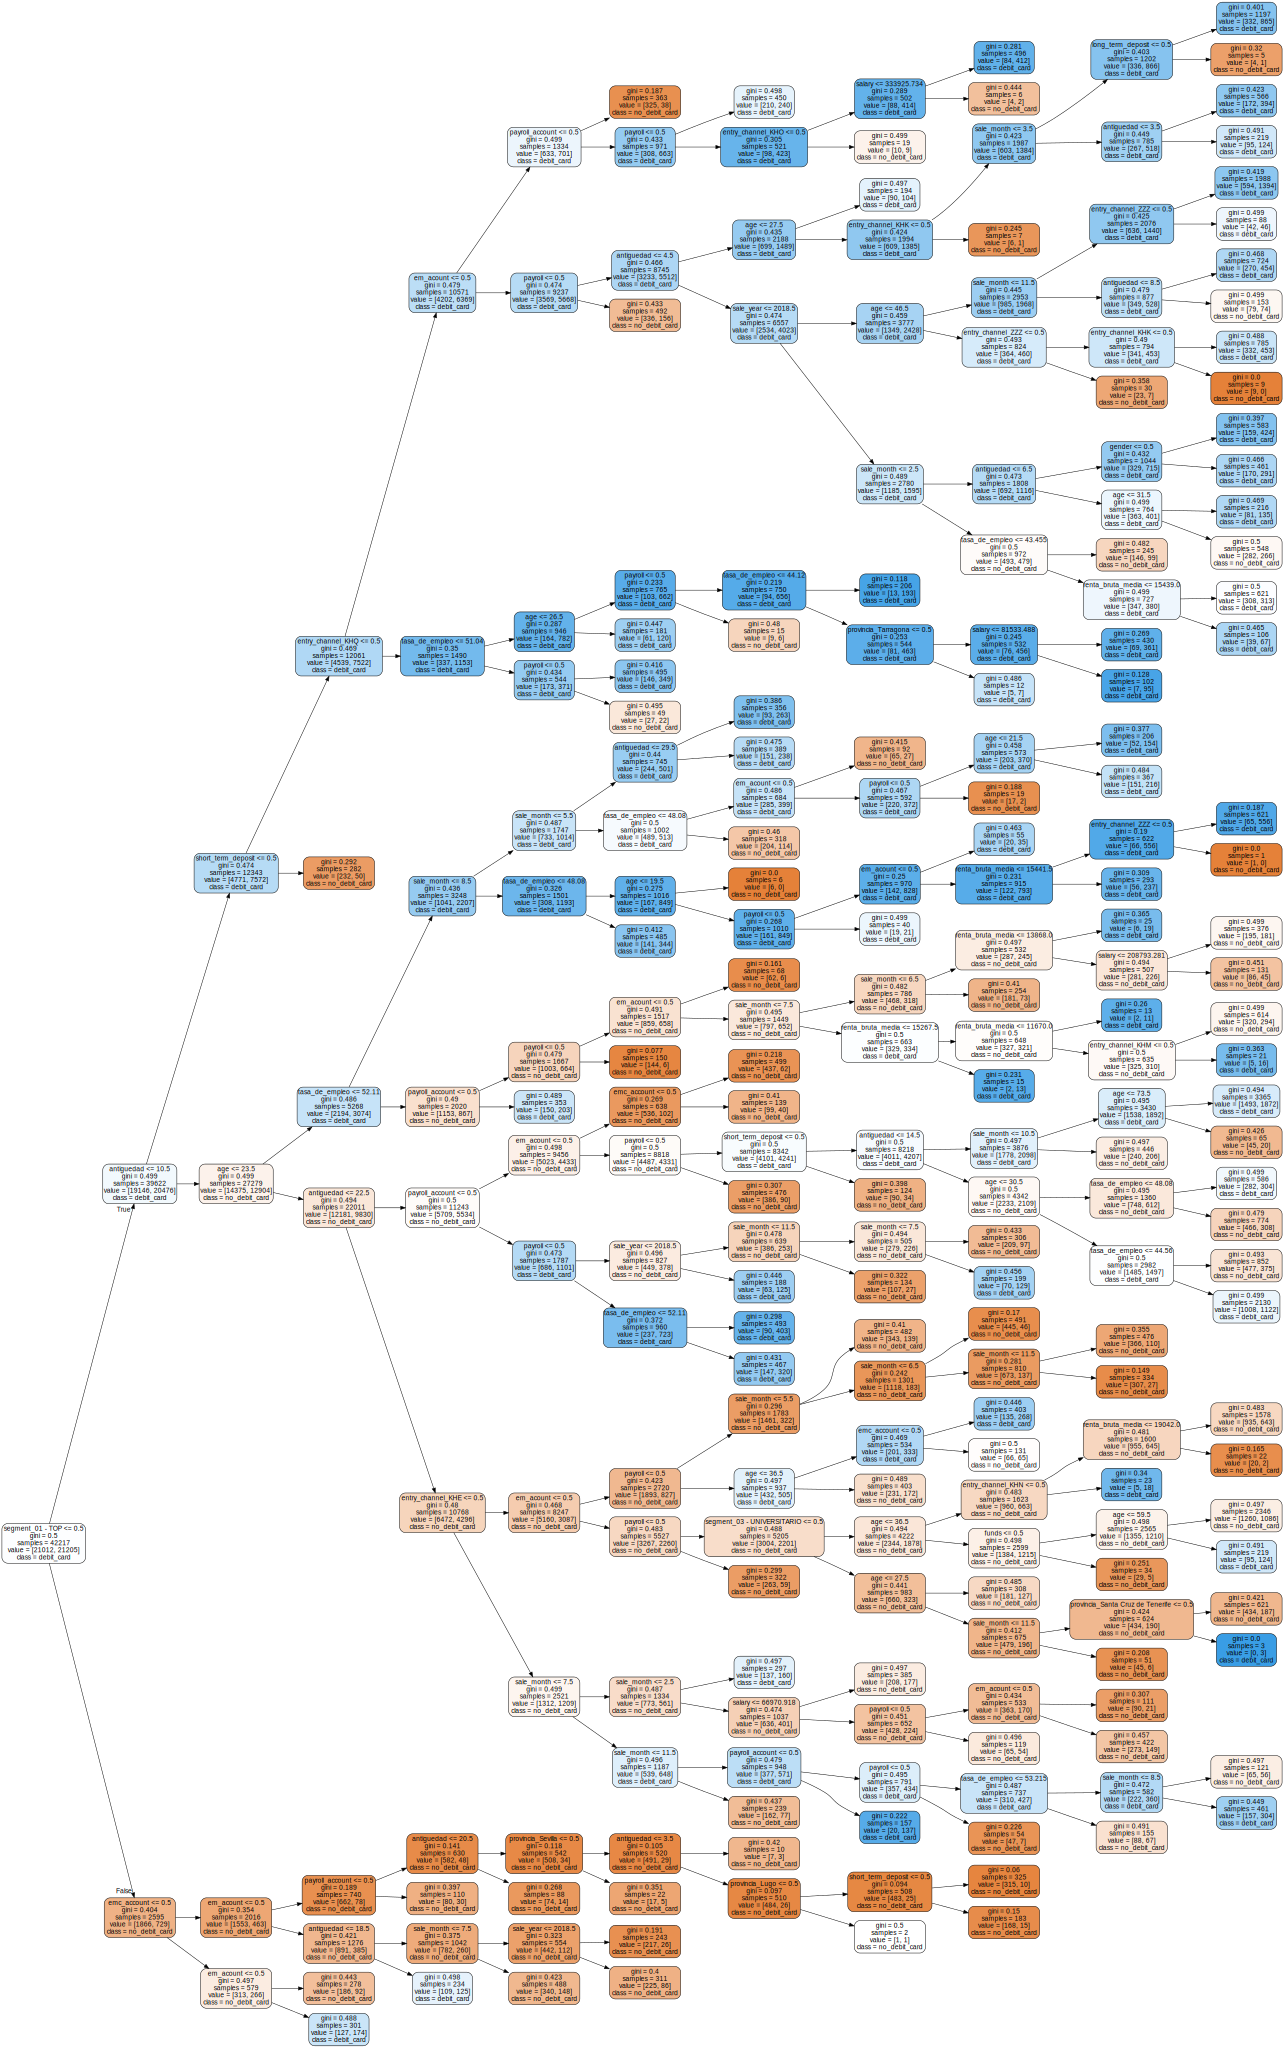

In [234]:
graphviz.Source(tree_data)

In [252]:
#generamos predicciones y evaluamos el modelo
y_test_pred = pd.DataFrame(dt.predict(X_test),index=y_test.index,columns=['debit_card_prediction'])

In [253]:
#join de y_test y y_test_pred para comparar el resultado real con la predicción
result_df=y_test.join(y_test_pred,how='inner')

In [254]:
result_df['Success']=(result_df[TARGET]==result_df['debit_card_prediction']).astype(int)

In [255]:
result_df.head()

,product_ID_3819,debit_card_prediction,Success
customer_ID,,,
17457,1,0,0
22635,0,1,0
43834,0,0,1
45901,1,0,0
58716,0,0,1


In [256]:
dt.score(X_train, y_train)

0.6454982589951915

In [257]:
dt.score(X_test, y_test)

0.6419272580861629

In [258]:
dt.score(val_df_X,val_df_y)
#En validación el resultado es regular, acierta un 61% de una distribución de 50 que tiene nuestro TARGET


0.6082347518820095

Métricas calidad

In [259]:
def metricas(y_test = y_test, y_test_pred = y_test_pred):
  modelo_tonto = dev_df_y[TARGET].mean()
  acc = metrics.accuracy_score(y_test,y_test_pred)
  precision = metrics.precision_score(y_test,y_test_pred)
  recall = metrics.recall_score(y_test,y_test_pred)
  f1_score = metrics.f1_score(y_test,y_test_pred)

  print(f"Accuracy: {acc}. > El modelo tonto daría: {modelo_tonto}" )
  print(f"Precision: {precision}. > Cuántos positivos de los que detecta realmente lo son")
  print(f"Recall: {recall}. > Cuántos positivos detecta el modelo del total")
  print(f"F1_Score: {f1_score}")

In [260]:
metricas()

Accuracy: 0.6419272580861629. > El modelo tonto daría: 0.5
Precision: 0.6352378271882916. > Cuántos positivos de los que detecta realmente lo son
Recall: 0.6219344171948195. > Cuántos positivos detecta el modelo del total
F1_Score: 0.6285157337788917


## AUC y ROC curve

In [261]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['debit_card_score']).sort_values(by='debit_card_score', ascending=False)

In [262]:
result_df = result_df.join(y_score)

In [263]:
result_df.sort_values(by='debit_card_score', ascending=False).head()

,product_ID_3819,debit_card_prediction,Success,debit_card_score
customer_ID,,,,
1463241,0,1,0,0.936893
1468274,1,1,1,0.936893
1467831,1,1,1,0.936893
1467910,1,1,1,0.936893
1409118,1,1,1,0.936893


In [264]:
metrics.roc_auc_score(result_df[TARGET],result_df['debit_card_score'])

0.6718862767344385

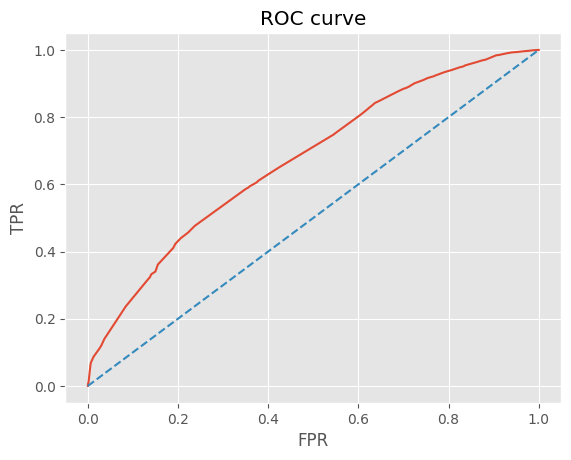

In [265]:
fpr_2,tpr_2,th_2=metrics.roc_curve(result_df[TARGET],result_df['debit_card_score'])
plt.plot(fpr_2,tpr_2)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Control del overfitting Decission Tree

In [248]:
for i in range(1,15):
  #instancio el modelo
  dt2= DecisionTreeClassifier(max_depth=i,random_state=42)
  #entreno el modelo
  dt2.fit(X_train,y_train)
  #evaluo
  acc_train = dt2.score(X_train,y_train)
  acc_test = dt2.score(X_test,y_test)
  print(f'Profundidad de arbol: {i}, Acc.train: {np.round(acc_train,6)},Acc.test: {np.round(acc_test,6)}')

Profundidad de arbol: 1, Acc.train: 0.529218,Acc.test: 0.523688
Profundidad de arbol: 2, Acc.train: 0.564062,Acc.test: 0.563817
Profundidad de arbol: 3, Acc.train: 0.590331,Acc.test: 0.593075
Profundidad de arbol: 4, Acc.train: 0.597721,Acc.test: 0.599651
Profundidad de arbol: 5, Acc.train: 0.609589,Acc.test: 0.608912
Profundidad de arbol: 6, Acc.train: 0.627259,Acc.test: 0.628104
Profundidad de arbol: 7, Acc.train: 0.6405,Acc.test: 0.628909
Profundidad de arbol: 8, Acc.train: 0.647962,Acc.test: 0.631861
Profundidad de arbol: 9, Acc.train: 0.660421,Acc.test: 0.645283
Profundidad de arbol: 10, Acc.train: 0.671436,Acc.test: 0.638975
Profundidad de arbol: 11, Acc.train: 0.685506,Acc.test: 0.642598
Profundidad de arbol: 12, Acc.train: 0.698226,Acc.test: 0.640585
Profundidad de arbol: 13, Acc.train: 0.711135,Acc.test: 0.63884
Profundidad de arbol: 14, Acc.train: 0.726271,Acc.test: 0.633875


In [249]:
#puedo probar con diferent numero de observaciones en el nodo final
for i in range(1,15):
  dt2= DecisionTreeClassifier(max_depth=i,random_state=42,min_samples_split=500)
  dt2.fit(X_train,y_train)
  acc_train = dt2.score(X_train,y_train)
  acc_test = dt2.score(X_test,y_test)


  print(f'Profundidad de arbol: {i}, Acc.train: {np.round(acc_train,6)},Acc.test: {np.round(acc_test,6)}')

Profundidad de arbol: 1, Acc.train: 0.529218,Acc.test: 0.523688
Profundidad de arbol: 2, Acc.train: 0.564062,Acc.test: 0.563817
Profundidad de arbol: 3, Acc.train: 0.590331,Acc.test: 0.593075
Profundidad de arbol: 4, Acc.train: 0.597484,Acc.test: 0.599651
Profundidad de arbol: 5, Acc.train: 0.60857,Acc.test: 0.607704
Profundidad de arbol: 6, Acc.train: 0.624014,Acc.test: 0.625956
Profundidad de arbol: 7, Acc.train: 0.635431,Acc.test: 0.625688
Profundidad de arbol: 8, Acc.train: 0.639197,Acc.test: 0.627969
Profundidad de arbol: 9, Acc.train: 0.645498,Acc.test: 0.641927
Profundidad de arbol: 10, Acc.train: 0.649075,Acc.test: 0.636559
Profundidad de arbol: 11, Acc.train: 0.654641,Acc.test: 0.643404
Profundidad de arbol: 12, Acc.train: 0.657579,Acc.test: 0.643806
Profundidad de arbol: 13, Acc.train: 0.658763,Acc.test: 0.643135
Profundidad de arbol: 14, Acc.train: 0.66035,Acc.test: 0.644209


## Modelos alternativos

### RANDOM FOREST

In [286]:
#Random Forest con 10 replicas
rf_2 = RandomForestClassifier(max_depth=9,random_state=420,min_samples_split=500,n_estimators=100)

In [287]:
rf_2.fit(X_train,y_train)

<ipython-input-287-7bdf2188c4c9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_2.fit(X_train,y_train)


RandomForestClassifier(max_depth=9, min_samples_split=500, random_state=420)

In [288]:
rf_acc_train = rf_2.score(X_train,y_train)
rf_acc_train

0.6440059691593434

In [289]:
rf_2.score(X_test,y_test)

0.6413904173936384

In [290]:
rf_2.score(val_df_X,val_df_y)
# El resultado en validación mejora, tiene un 69% de acierto, sobre la distribución del 50% que tiene nuestro TARGET


0.5355661391918881

### XGBOOST (sklearn)

In [291]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [292]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=500, random_state=42)

In [293]:
gb.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(max_depth=5, min_samples_split=500, n_estimators=50,
                           random_state=42)

In [294]:
gb.score(X_train,y_train)

0.667361489447379

In [295]:
gb.score(X_test,y_test)

0.6553482753992753

In [296]:
acc_grad_val = gb.score(val_df_X,val_df_y)
#En validación el resultado vuelve a empeorar frente al random forest, acierta un 63% de una distribución de 50 que tiene nuestro TARGET
acc_grad_val

0.5696727607927485

### Establecimiento de hiperparámetros óptimos para el GradientBoosting

In [ ]:
param_grid = {
    'n_estimators': [20, 50, 70, 100],
    'max_depth': [3, 4, 5, 6, 7, 8]
}

In [ ]:
model_gb = GradientBoostingClassifier()

In [ ]:
# grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, np.ravel(y_train))

In [ ]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

In [ ]:
# print(best_params)
# print(best_model)

In [ ]:
# accuracy = best_model.score(X_test, y_test)
# print(accuracy)

## XGBOOST (original)

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)

In [ ]:
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Entrenar el modelo
num_rounds = 100
model_xgb = xgb.train(params, dtrain, num_rounds)

In [ ]:
dtest = xgb.DMatrix(data=X_test)

In [ ]:
predictions = model_xgb.predict(dtest)

In [ ]:
predictions

array([0.5379364 , 0.23372155, 0.62428117, ..., 0.33636603, 0.93640643,
       0.44954193], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Convertir las predicciones a etiquetas binarias (0 o 1)
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

In [ ]:
# Calcular el accuracy
accuracy_xgboost = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy_xgboost)

Accuracy: 0.6652227722772277


In [ ]:
dval = xgb.DMatrix(data=val_df_X, label=val_df_y)

In [ ]:
val_predictions = model_xgb.predict(dval)

In [ ]:
binary_val_predictions = [1 if p >= 0.5 else 0 for p in val_predictions]

In [ ]:
val_accuracy_xgboost = accuracy_score(val_df_y, binary_val_predictions)
print("Validation Accuracy:", val_accuracy_xgboost)

Validation Accuracy: 0.5922568750960209


## Variables más predictivas

In [ ]:
top_features_dt = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [ ]:
top_features_dt
# Aquí vemos las variables que el modelo Decision Tree ha considerado como más predictivas

pension_plan                 0.358509
em_acount                    0.128186
age                          0.089244
sale_month                   0.088955
antiguedad                   0.084768
payroll_account              0.063513
tasa_de_empleo               0.052829
sale_year                    0.050349
segment_01 - TOP             0.043326
emc_account                  0.021227
short_term_deposit           0.010391
entry_channel_KHE            0.002443
segment_02 - PARTICULARES    0.002230
renta_bruta_media            0.001845
salary                       0.001736
gender                       0.000448
provincia_Córdoba            0.000000
provincia_León               0.000000
provincia_Granada            0.000000
provincia_Murcia             0.000000
dtype: float64

In [ ]:
top_features_2_rd = pd.Series(rf_2.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [ ]:
top_features_2_rd
# Aquí vemos las variables que el modelo Random Forest ha considerado como más predictivas

em_acount                     0.142441
pension_plan                  0.136870
payroll                       0.110575
segment_01 - TOP              0.074769
antiguedad                    0.059804
age                           0.057952
short_term_deposit            0.054513
payroll_account               0.051253
sale_month                    0.043302
tasa_de_empleo                0.036177
salary                        0.020345
entry_channel_KFC             0.017633
segment_03 - UNIVERSITARIO    0.017551
emc_account                   0.017252
renta_bruta_media             0.017193
entry_channel_KAT             0.016473
sale_year                     0.014911
entry_channel_KHQ             0.014415
segment_02 - PARTICULARES     0.014169
provincia_Madrid              0.011547
dtype: float64

In [ ]:
top_features_2_gb = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [ ]:
top_features_2_gb
# Aquí vemos las variables que el modelo Gradient Boosting ha considerado como más predictivas

pension_plan                  0.262875
em_acount                     0.117404
sale_month                    0.097006
age                           0.088009
antiguedad                    0.082904
payroll_account               0.062293
tasa_de_empleo                0.048081
segment_01 - TOP              0.047669
payroll                       0.047335
sale_year                     0.040381
short_term_deposit            0.021234
emc_account                   0.020141
entry_channel_KHE             0.011710
entry_channel_KHQ             0.010850
segment_02 - PARTICULARES     0.006575
salary                        0.005885
entry_channel_KHN             0.002920
renta_bruta_media             0.002782
segment_03 - UNIVERSITARIO    0.002465
entry_channel_KFC             0.002048
dtype: float64

## Comparación entre modelos

In [ ]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 8

models = [
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

ROC AUC Score for DecisionTree: 0.7169538693490619
ROC AUC Score for RandomForest: 0.7046742548288363
ROC AUC Score for GradientBoosting: 0.7418174315810353


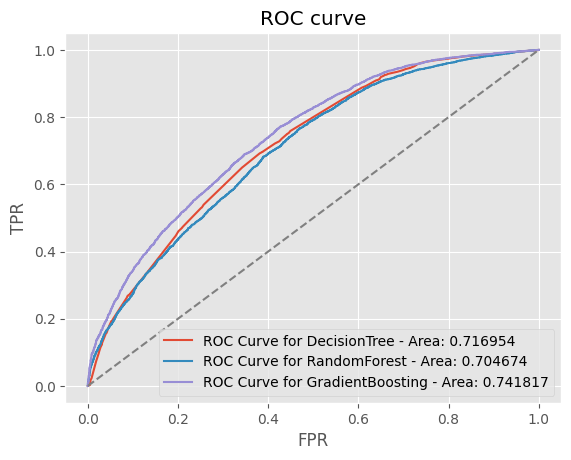

In [ ]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [ ]:
rf_acc_train

0.6553471282150455

In [ ]:
print(f"Decision Tree Train: {dt_acc_train}")
print(f"Decision Tree Val: {dt_acc_val}")
print()
print(f"Decision Tree Train: {rf_acc_train}")
print(f"Decision Tree Val: {rf_acc_val}")
print()
print(f"Gradient Boosting Train: {acc_grad}")
print(f"Gradient Boosting Val: {acc_grad_val}")
print()
print(f"XGBoost Train:{accuracy_xgboost}")
print(f"XGBoost Val: {val_accuracy_xgboost}")
print()

Decision Tree Train: 0.6572036356604138
Decision Tree Val: 0.5664464587494239

Decision Tree Train: 0.6553471282150455
Decision Tree Val: 0.5119065908741742

Gradient Boosting Train: 0.6737768323341713
Gradient Boosting Val: 0.5621447226916577

XGBoost Train:0.6652227722772277
XGBoost Val: 0.5922568750960209



In [ ]:
# SIGUIENTES PASOS

# --> Métricas y evaluación de métricas del random forest

# --> Acordar dos target más (me parecen buena opción la debit_card y la cuenta emc_account)
# Se me ocurre como estrategia de marketing ofrecer el pack plan de pensiones + emc_account a ambos grupos de clientes potenciales para diversificar riesgo,
# teniendo algo muy seguro y largoplazista y otra inversión más especulativa (se apoya esta estrategia en que el grueso de los clientes son gente joven a la que puede interesar el mix)
# --> Adaptar el dataset2 y dataset3 para lanzar los modelos sobre el target2 y target3